In [1]:
!pip install python-dotenv

In [2]:
import cv2
import numpy as np
import tensorflow as tf
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from dotenv import load_dotenv
from os import environ as env

In [3]:
dataset_train = "/content/drive/MyDrive/17flowers/train"
dataset_test = "/content/drive/MyDrive/17flowers/test"

In [4]:
img_data_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)


train_dataset = img_data_generator.flow_from_directory(
    dataset_train,
    shuffle=True,
    subset="training",
    target_size=(224,224)
)

validation_dataset = img_data_generator.flow_from_directory(
    dataset_test,
    shuffle=True,
    subset="validation",
    target_size=(224,224)
)

Found 823 images belonging to 17 classes.
Found 65 images belonging to 17 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( filters=64 , kernel_size=(3,3) , strides=(2,2) , activation="relu", padding="same" , input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D( filters=128 , kernel_size=(3,3) , strides=(1,1) , activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D( filters=256 , kernel_size=(3,3) , strides=(1,1) , activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512 , activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(17    , activation="softmax")
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer=tf.keras.optimizers.Nadam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=["accuracy"])


In [7]:
history = model.fit( train_dataset , validation_data=validation_dataset , epochs=30 )

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 207s 6s/step - accuracy: 0.0804 - loss: 3.2134 - val_accuracy: 0.2769 - val_loss: 2.2787
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.2578 - loss: 2.2808 - val_accuracy: 0.4000 - val_loss: 1.6554
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.4537 - loss: 1.7181 - val_accuracy: 0.5692 - val_loss: 1.3503
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.5590 - loss: 1.3698 - val_accuracy: 0.6308 - val_loss: 1.1742
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.7169 - loss: 0.8656 - val_accuracy: 0.6308 - val_loss: 1.3220
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.8198 - loss: 0.5455 - val_accuracy: 0.6000 - val_loss: 1.4739
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.8104 - loss: 0.5096 - val_accuracy: 0.5692 - val_loss: 1.8775
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.8847 - loss: 0.3792 - val_accuracy: 0.6154 - val

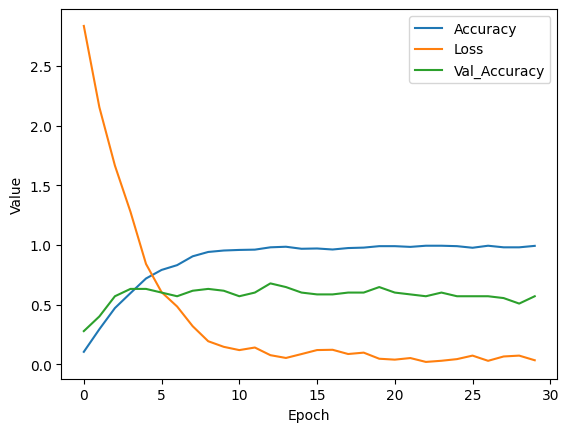

In [8]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Accuracy","Loss" , "Val_Accuracy" ])
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.show()

In [9]:
model.save("/content/weights.h5")
model.save("/content/weights.keras")

In [10]:
loss , accuracy = model.evaluate(validation_dataset)
loss , accuracy

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5541 - loss: 3.0201 


(2.841505765914917, 0.5692307949066162)

In [11]:
ypred = model.predict(validation_dataset)
ypred.shape

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step


(65, 17)

In [12]:
ypred_list = []
for i in range(65) :
    ypred_list.append(np.argmax(ypred[i]))
np.array(ypred_list)

array([ 4, 16,  6,  6,  2, 11, 14,  1, 13,  7,  0, 12, 12,  9, 15, 14,  4,
        1, 12,  7,  1,  2,  0,  1, 11,  7,  8, 16, 11,  1, 12,  1,  6,  5,
        8,  4, 11, 10,  1, 11,  0,  6,  9,  4, 13,  8,  9,  9, 14,  7,  1,
        1, 10,  1,  6, 14,  1, 11,  7,  0,  7, 13,  5,  5,  9])

In [13]:
validation_dataset.labels

array([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,
        4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,
        8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12,
       13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16],
      dtype=int32)

In [14]:
images,labels = validation_dataset[0]
ypred_list = []
for image in images:
    image = np.expand_dims(image, axis=0)
    ypred=model.predict(image)
    ypred_list.append(np.argmax(ypred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

In [15]:
validation_dataset.batch_size

32

In [16]:
ytrue_list = []
for label in labels:
    ytrue_list.append(np.argmax(label))
np.array(ytrue_list)

array([11, 14,  2, 15, 12, 13, 10, 15,  8, 13, 15,  5, 16,  9,  3,  6, 16,
       11,  3,  5,  3,  5,  7,  5,  7, 10,  4,  1,  6,  8,  2,  9])

In [17]:
np.array(ytrue_list).shape
np.array(ypred_list)

array([11, 14,  7,  7, 12, 13, 12,  5,  8, 13,  1,  5, 11,  9,  1,  4, 16,
       11,  9,  5, 11,  7,  1,  1,  7,  6,  4,  1,  6, 12,  7,  9])

In [18]:
confmatrix = confusion_matrix(y_true= ytrue_list , y_pred= ypred_list )
confmatrix

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

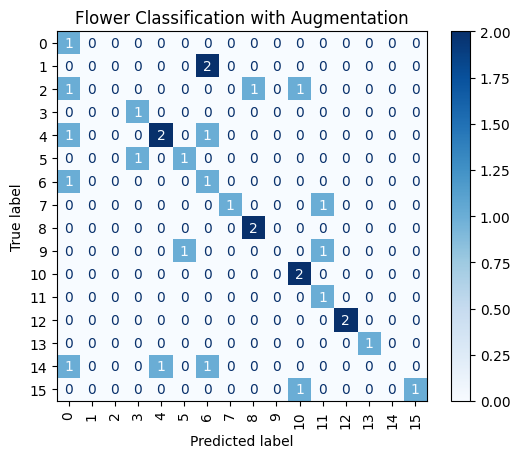

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm_display = ConfusionMatrixDisplay(confusion_matrix = confmatrix)
cm_display.plot(cmap=plt.cm.Blues , xticks_rotation="vertical")
plt.title("Flower Classification with Augmentation")
plt.show()

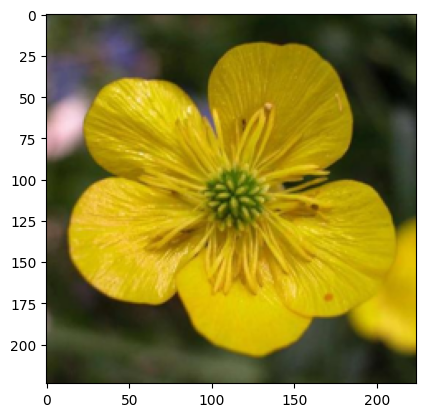

In [21]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
image = Image.open("/content/flower.jpg")
new_image = image.resize((224,224))
new_image.save("/content/image.jpg")
plt.imshow(new_image)

In [22]:
new_image = cv2.imread("/content/image.jpg" , 0)
new_image = cv2.cvtColor(new_image , cv2.COLOR_BGR2RGB)
print(new_image.shape)
img = np.reshape(new_image, [1, 224, 224, 3])
print(img.shape)
output = model.predict(img)

predicted_class = np.argmax(output)
print(predicted_class)
print(train_dataset.class_indices)
print(np.argmax(output))
mylist = list(train_dataset.class_indices)
print("predicted label : " , mylist[np.argmax(output)])

(224, 224, 3)
(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
6
{'bluebell': 0, 'buttercup': 1, 'coltsfoot': 2, 'cowslip': 3, 'crocus': 4, 'daffodil': 5, 'daisy': 6, 'dandelion': 7, 'fritillary': 8, 'iris': 9, 'lilyvalley': 10, 'pansy': 11, 'snowdrop': 12, 'sunflower': 13, 'tigerlily': 14, 'tulip': 15, 'windflower': 16}
6
predicted label :  daisy


In [23]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

model = load_model("/content/weights.keras")
output = model.predict(img)

predicted_class = np.argmax(output)
# print(output)
print(predicted_class)
print(train_dataset.class_indices)
# print(train_dataset.classes)
print(np.argmax(output))
mylist = list(train_dataset.class_indices)
print("predicted label : " , mylist[np.argmax(output)])


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 23 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
6
{'bluebell': 0, 'buttercup': 1, 'coltsfoot': 2, 'cowslip': 3, 'crocus': 4, 'daffodil': 5, 'daisy': 6, 'dandelion': 7, 'fritillary': 8, 'iris': 9, 'lilyvalley': 10, 'pansy': 11, 'snowdrop': 12, 'sunflower': 13, 'tigerlily': 14, 'tulip': 15, 'windflower': 16}
6
predicted label :  daisy
